In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from pandas import set_option
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as md
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn
import statsmodels as stm
import patsy

## Loading the allcars dataset and selecting two vehicles

In [2]:
set_option('display.max_rows', 2)
data = pd.read_csv('allcars.csv', nrows = 240000, index_col=0)
data

,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,2017-10-31 18:45:59.000000,0,ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...,2.2,14.48,NaN,NaN,44.313725,NaN,NaN,0.0,0.0,903.0,4.0,NaN,15.686275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16065,2017-09-21 20:10:29.000000,2,0ca800f007980009c50108c3ff07c20008c20108c30009...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4


In [3]:
dfv1 = pd.DataFrame(); dfv2 = pd.DataFrame();
dfv1 = data.loc[data.deviceID == 1]; dfv2 = data.loc[data.deviceID == 2]

In [4]:
set_option('display.max_rows', 10)
dfv1.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,117275.000000,117275.000000,117275.000000,0.0,0.0,117275.000000,0.0,0.0,117275.000000,117275.000000,117275.000000,117275.000000,0.0,117275.000000,117275.0
mean,50.327896,8.114516,12.437785,NaN,NaN,46.855066,NaN,NaN,0.003199,0.406219,852.304570,15.390501,NaN,17.561893,1.0
std,22.836783,11.257505,4.295417,NaN,NaN,29.376612,NaN,NaN,0.103067,12.948273,901.577115,21.706871,NaN,7.183419,0.0
min,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0
25%,29.000000,0.000000,12.880000,NaN,NaN,23.921569,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,15.686275,1.0
50%,54.000000,0.000000,14.000000,NaN,NaN,52.156863,NaN,NaN,0.000000,0.000000,902.000000,0.000000,NaN,20.000000,1.0
75%,71.000000,14.900000,14.260000,NaN,NaN,70.196078,NaN,NaN,0.000000,0.000000,1516.000000,28.000000,NaN,20.392157,1.0
max,87.000000,52.900000,48.914000,NaN,NaN,99.607843,NaN,NaN,13.304381,593.990000,12228.500000,191.000000,NaN,74.901961,1.0


In [5]:
dfv2.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,106659.000000,106659.000000,106659.000000,106460.000000,106460.0,106659.000000,106460.000000,106460.000000,106659.000000,106659.000000,106659.000000,106659.000000,106460.0,106659.000000,106659.0
mean,63.579239,18.188948,0.009114,64.143575,0.0,35.413494,31.122901,96.442175,0.000664,0.025123,1182.769860,33.042819,0.0,0.001324,2.0
std,38.780889,18.726188,0.665543,29.107386,0.0,22.531762,15.797552,47.344598,0.048472,1.834499,762.717486,34.009781,0.0,0.096652,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.0
25%,25.000000,0.000000,0.000000,60.000000,0.0,22.352941,24.000000,97.000000,0.000000,0.000000,800.750000,0.000000,0.0,0.000000,2.0
50%,60.000000,13.600000,0.000000,80.000000,0.0,38.823529,34.000000,99.000000,0.000000,0.000000,1165.750000,25.000000,0.0,0.000000,2.0
75%,99.000000,27.700000,0.000000,81.000000,0.0,48.235294,43.000000,110.000000,0.000000,0.000000,1732.500000,50.000000,0.0,0.000000,2.0
max,126.000000,82.100000,48.607000,84.000000,0.0,94.901961,58.000000,221.000000,3.540058,133.980000,5508.500000,157.000000,0.0,7.058824,2.0


In [6]:
#Deleting less important variables
dfv1 = dfv1.drop(['cTemp','dtc','iat','imap','tAdv','deviceID'], axis = 1)
dfv2 = dfv2.drop(['dtc','tAdv','deviceID'], axis = 1)

## Now we select the largest trips from each vehicle

In [7]:
#Find the largets trip in dataframe and report wich its ID
def largest_trip(df, column):
    x = np.zeros(np.max(df[column]))
    for i in range(0,np.max(df[column])):
        x[i] = len(df.loc[df[column] == i])
    return(np.max(x),np.argmax(x))

In [8]:
print('Vehicle 1: ',largest_trip(dfv1, 'tripID'))
print('Vehicle 2: ',largest_trip(dfv2, 'tripID'))

Vehicle 1:  (6496.0, 78)
Vehicle 2:  (4256.0, 124)


In [9]:
trip78 = dfv1.loc[dfv1['tripID'] == 78]
trip124 = dfv2.loc[dfv2['tripID'] == 124]

## We convert the time stamp column to datetime format used by pandas 

In [10]:
trip78['timeStamp'] = pd.to_datetime(trip78['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")
trip124['timeStamp'] = pd.to_datetime(trip124['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")

/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#Function to plot  the trip features like time series
trip78temp = trip78

## Ploting the time series 

In [12]:
#setting the timeStamp column like the dataframe new index
trip78temp.set_index('timeStamp', inplace=True)

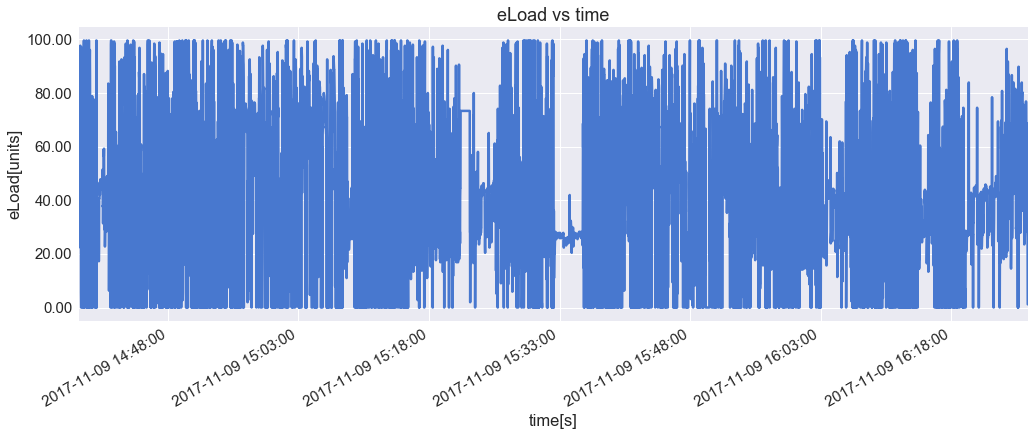

In [13]:
#Example time serie plot
title = 'eLoad vs time'
f= plt.figure(figsize = (17,6))
#ax = sns.tsplot(data=trip78temp['eLoad'])
plt.title(title)
#ticklabels = trip78temp.index.strftime('%Y-%m-%d %H:%M:%S')
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax = trip78temp['eLoad'].plot()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.ylabel('eLoad[units]')
plt.xlabel('time[s]')
plt.show()

In [14]:
def plot_time_series(feature, title, xlabel, ylabel, datetimeformat):
    
    f= plt.figure(figsize = (17,6))
    plt.title(title)
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=25 )
    ax = plt.gca()
    xfmt = md.DateFormatter(datetimeformat)
    ax.xaxis.set_major_formatter(xfmt)
    ax = feature.plot(color='b',lw = 1)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    return ax

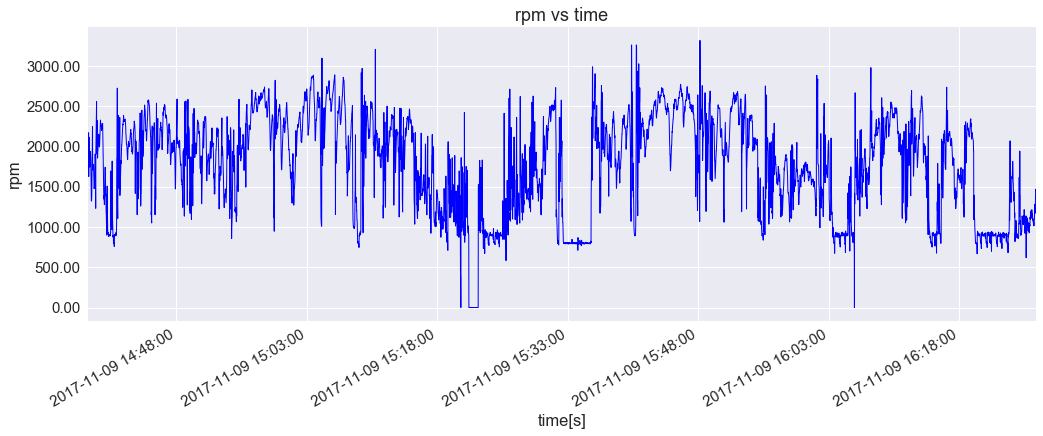

In [15]:
datetimeformat = '%Y-%m-%d %H:%M:%S'
plot_time_series(trip78temp['rpm'], 'rpm vs time', 'time[s]', 'rpm', datetimeformat)

In [16]:
#subploting some features
def plot_some_tseries(time, feature0, feature1, feature2, feature3, title, xlabel, ylabel0, ylabel1, ylabel2, ylabel3,
                      datetimeformat):
    
    xleft = time.min(); xright = time.max();
    
    f, axarr = plt.subplots(nrows = 4, ncols = 1, figsize = (17,12))
    axarr[0].set_title(title)
    plt.subplots_adjust(bottom = 0.2)
    plt.xticks(rotation = 25)
    for i in range(len(axarr)):
        axarr[i].set_xlim(xleft,xright)
        axarr[i].locator_params(axis = 'y', nbins=3)
    
    xfmt = md.DateFormatter(datetimeformat)
    
    axarr[3].xaxis.set_major_formatter(xfmt)
    
    axarr[0].plot(time, feature0,'g',lw = 0.8)
    axarr[1].plot(time, feature1,'b',lw = 0.8)
    axarr[2].plot(time, feature2,'r',lw = 0.8)
    axarr[3].plot(time, feature3,'black',lw = 0.8)
    
    axarr[3].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


    axarr[0].set_ylabel(ylabel0)
    axarr[1].set_ylabel(ylabel1)
    axarr[2].set_ylabel(ylabel2)
    axarr[3].set_ylabel(ylabel3)
    
    axarr[3].set_xlabel(xlabel)
    axarr[1].set_xticklabels([]); axarr[2].set_xticklabels([]); axarr[0].set_xticklabels([]);
    
    #return axarr

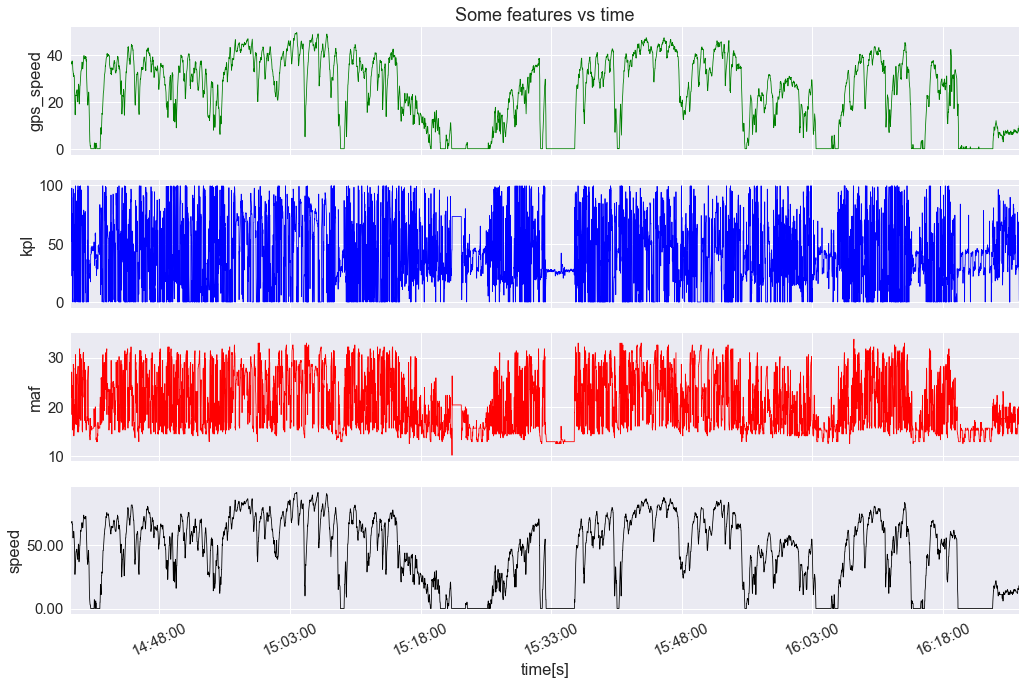

In [17]:
time = trip78temp.index
datetimeformat = '%H:%M:%S'

plot_some_tseries(time, trip78temp['gps_speed'], trip78temp['eLoad'], trip78temp['tPos'], trip78temp['speed'],
                  'Some features vs time', 'time[s]', 'gps_speed', 'kpl', 'maf', 'speed', datetimeformat)